In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tabulate import tabulate
import statistics
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter("ignore")

In [2]:
#excel datasets

industry_df = pd.read_excel("Industry_Portfolios.xlsx")
market_df = pd.read_excel("Market_Portfolio.xlsx")
risk_df = pd.read_excel("Risk_Factors.xlsx")

industry_df = industry_df.drop(columns = "Date")


# Linear Factor Models

## Performance Measurement

Risk_Factors.xlsx contains monthly observations of the risk-free rate and the three Fama–French risk factors (expressed as percentages, but without "%"), over the ten-year period from Jan 2004 through Dec 2013.

Using excess returns for the ten industry portfolios, calculate the following performance metrics:

Sharpe ratio \
Sortino ratio (using risk-free rate as target) \
Treynor ratio (using CAPM β) \
Jensen's α \
Three-factor α 

In [3]:
## SHARPE RATIO

name = []
sharpe = []
excess_industry_df = industry_df.copy()

for col in excess_industry_df:
    
    excess_industry_df[col] = industry_df[col] - risk_df["Rf"]
    mean_return = statistics.mean(excess_industry_df[col])
    std_return = statistics.stdev(excess_industry_df[col])
     
    sharpe_ratio = mean_return / std_return
    
    name.append(col)
    sharpe.append(sharpe_ratio)

# Tabulate
table = zip(name, sharpe)
col_names = ["Name","Sharpe Ratio"]
print(tabulate(table, headers = col_names))


Name      Sharpe Ratio
------  --------------
NoDur        0.231099
Durbl        0.0723556
Manuf        0.166616
Enrgy        0.181708
HiTec        0.118552
Telcm        0.169064
Shops        0.191753
Hlth         0.172529
Utils        0.210948
Other        0.0646929


In [4]:
## SORTINO RATIO

name = []
SV = excess_industry_df.copy()
SV[SV > 0] = 0
SV = SV ** 2

sortino = []

for col in SV:
    mean_return = np.mean(excess_industry_df[col])
    sortino_ratio = mean_return / (SV[col].mean() ** 0.5)
    
    name.append(col)
    sortino.append(sortino_ratio)
    
# Tabulate
table = zip(name, sortino)
col_names = ["Name","Sortino Ratio"]
print(tabulate(table, headers = col_names))
        


Name      Sortino Ratio
------  ---------------
NoDur         0.350804
Durbl         0.111967
Manuf         0.24126
Enrgy         0.273612
HiTec         0.17062
Telcm         0.24494
Shops         0.293032
Hlth          0.270294
Utils         0.290044
Other         0.0873509


In [5]:
## Treynor Ratio

name = []
treynor = []

excess_market_df = market_df["Market"] - risk_df["Rf"]

for col in excess_industry_df:
    result = np.polyfit(excess_market_df, excess_industry_df[col], deg=1)
    beta = result[0]
    mean_return = np.mean(excess_industry_df[col])
    treynor_ratio = mean_return / beta
    
    name.append(col)
    treynor.append(treynor_ratio)
    
# Tabulate
table = zip(name, treynor)
col_names = ["Name","Treynor Ratio"]
print(tabulate(table, headers = col_names))
    

Name      Treynor Ratio
------  ---------------
NoDur          1.18637
Durbl          0.367463
Manuf          0.758251
Enrgy          1.14333
HiTec          0.564295
Telcm          0.836363
Shops          0.951258
Hlth           0.971435
Utils          1.45233
Other          0.299781


In [6]:
## Jensen's α

name = []
jensen = []

for col in excess_industry_df:
    result = np.polyfit(excess_market_df, excess_industry_df[col], deg=1)
    beta = result[0]
    mean_return = np.mean(excess_industry_df[col])
    jensen_alpha = mean_return - beta * (risk_df["Rm-Rf"].mean())
    
    name.append(col)
    jensen.append(jensen_alpha)
    
# Tabulate
table = zip(name, jensen)
col_names = ["Name","Jensen's Alpha"]
print(tabulate(table, headers = col_names))



Name      Jensen's Alpha
------  ----------------
NoDur          0.369717
Durbl         -0.417903
Manuf          0.160494
Enrgy          0.504485
HiTec         -0.0640236
Telcm          0.194348
Shops          0.274093
Hlth           0.236968
Utils          0.446523
Other         -0.387508


In [7]:
## Three-factor α

factors = risk_df[['Rm-Rf','SMB','HML']]

name = []

result = LinearRegression().fit(factors, excess_industry_df)
result_alpha = result.intercept_
    
for col in excess_industry_df:
    
    name.append(col)
    
# Tabulate
table = zip(name, result_alpha)
col_names = ["Name","Three-factor Alpha"]
print(tabulate(table, headers = col_names))

    


Name      Three-factor Alpha
------  --------------------
NoDur              0.386704
Durbl             -0.474342
Manuf              0.153285
Enrgy              0.523007
HiTec             -0.0659794
Telcm              0.200724
Shops              0.255941
Hlth               0.257472
Utils              0.474411
Other             -0.404412


The sample semi-variance can be estimated as:

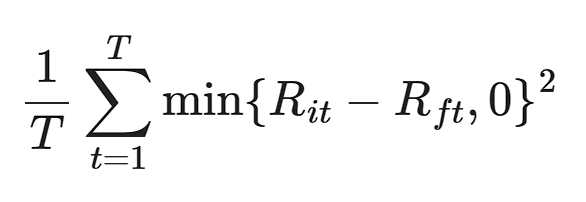

 where Ri is return on industry portfolio and Rf is risk-free rate.

Create a table showing the performance metrics for the ten industry portfolios.

Plot your results as a bar chart for each performance metric.

In [8]:
table = zip(name, sharpe, sortino,treynor,jensen ,result_alpha)
col_names = ["Name","Sharpe Ratio","Sortino Ratio","Treynor Ratio","Jensen's Alpha","Three-factor Alpha"]
print(tabulate(table, headers = col_names))

Name      Sharpe Ratio    Sortino Ratio    Treynor Ratio    Jensen's Alpha    Three-factor Alpha
------  --------------  ---------------  ---------------  ----------------  --------------------
NoDur        0.231099         0.350804          1.18637          0.369717              0.386704
Durbl        0.0723556        0.111967          0.367463        -0.417903             -0.474342
Manuf        0.166616         0.24126           0.758251         0.160494              0.153285
Enrgy        0.181708         0.273612          1.14333          0.504485              0.523007
HiTec        0.118552         0.17062           0.564295        -0.0640236            -0.0659794
Telcm        0.169064         0.24494           0.836363         0.194348              0.200724
Shops        0.191753         0.293032          0.951258         0.274093              0.255941
Hlth         0.172529         0.270294          0.971435         0.236968              0.257472
Utils        0.210948         0.29004

Text(0.5, 1.0, 'Sharpe Ratio')

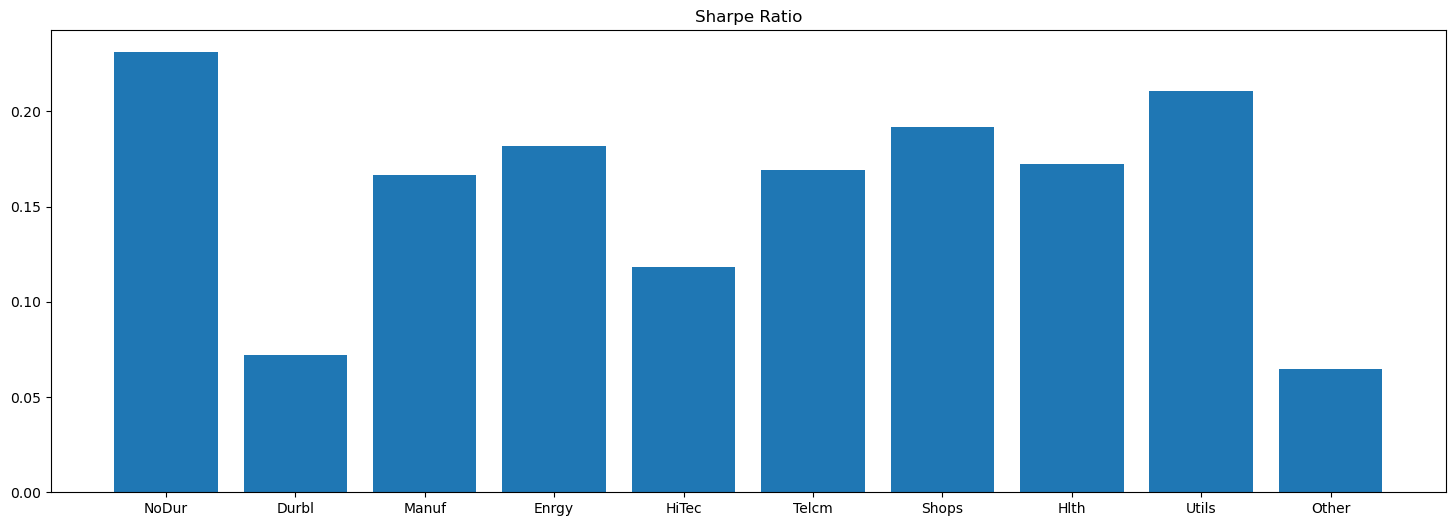

In [9]:
# plot sharpe ratio
plt.figure(figsize = (18, 6))
plt.bar(name,sharpe)
plt.title("Sharpe Ratio")

Text(0.5, 1.0, 'Sortino Ratio')

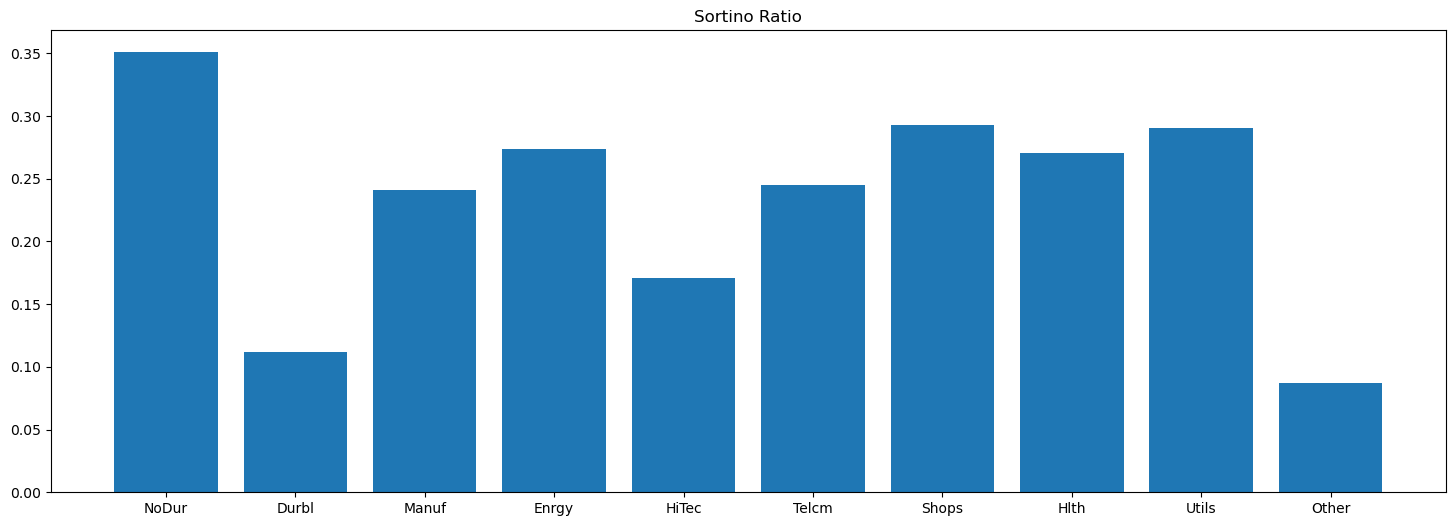

In [10]:
# plot sortino ratio
plt.figure(figsize = (18, 6))
plt.bar(name,sortino)
plt.title("Sortino Ratio")

Text(0.5, 1.0, 'Treynor Ratio')

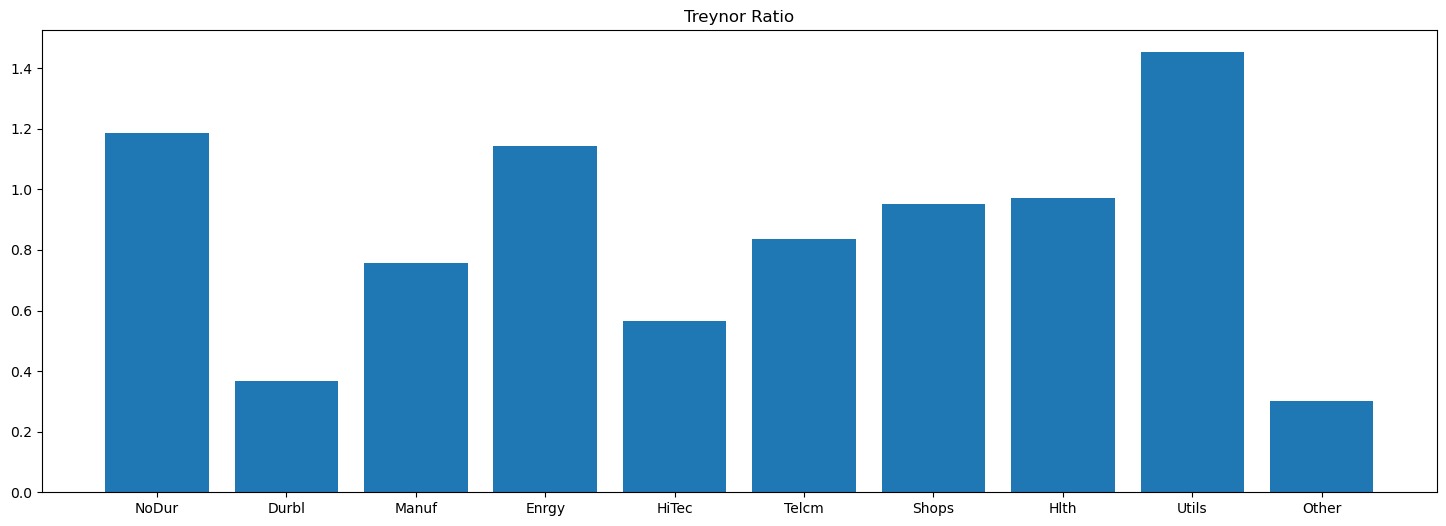

In [11]:
# plot treynor ratio
plt.figure(figsize = (18, 6))
plt.bar(name,treynor)
plt.title("Treynor Ratio")

Text(0.5, 1.0, "Jensen's Alpha")

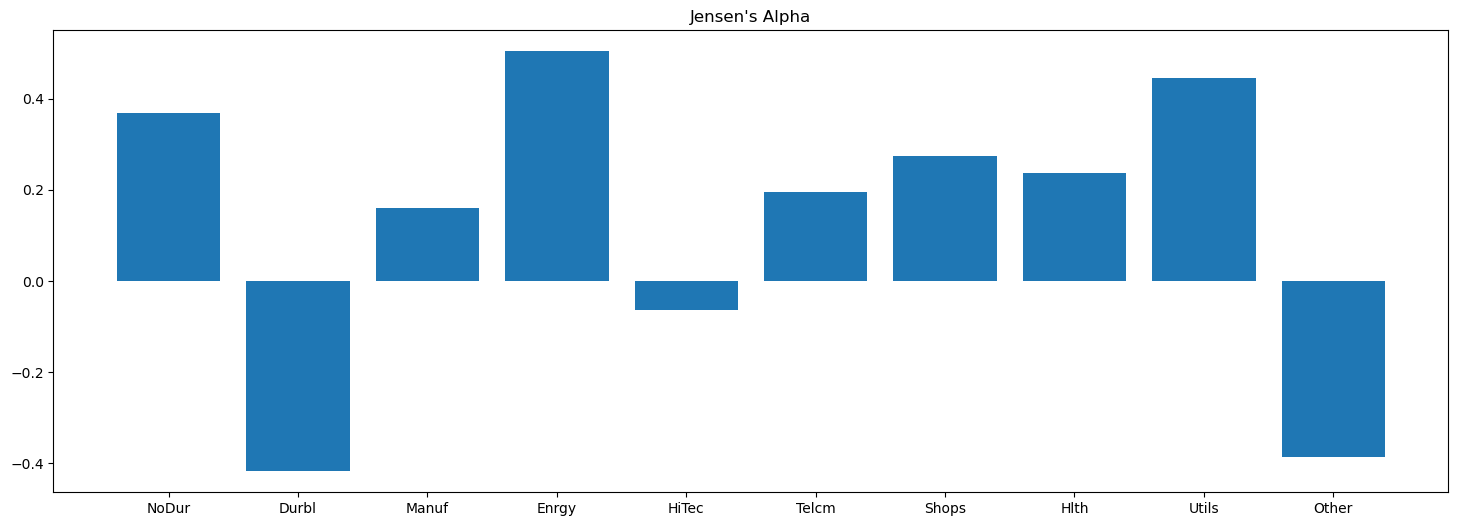

In [12]:
# plot jensen's alpha
plt.figure(figsize = (18, 6))
plt.bar(name,jensen)
plt.title("Jensen's Alpha")

Text(0.5, 1.0, 'Three-factor alpha')

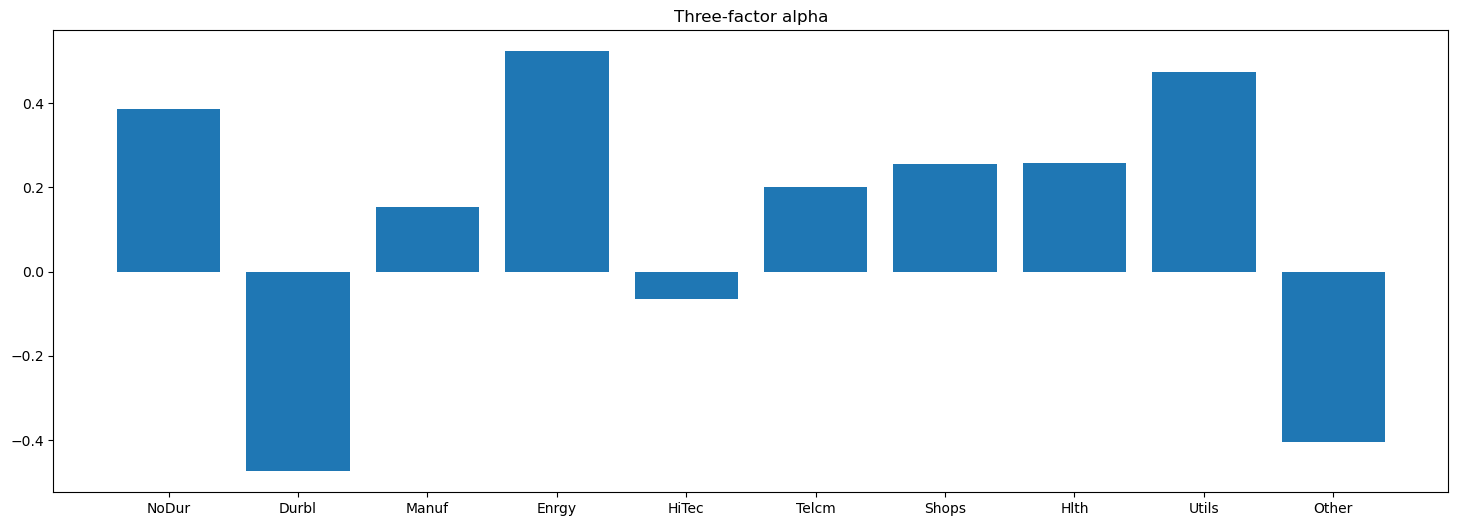

In [13]:
# plot three-factor alpha
plt.figure(figsize = (18, 6))
plt.bar(name,result_alpha)
plt.title("Three-factor alpha")

Briefly explain the economic significance of each of the three performance ratios (but not α's).
Please submit all relevant results (including graphs and qualitative discussion of economic significance) as an Adobe PDF file to Homework 3 before the end of Sunday, 1 Oct 2023.

Sharpe Ratio: Sharpe Ratio is the risk premium per unit of standard deviation. The denominator is designed to capture total risk, both systematic and idiosyncratic risk. Hence, it is not appropriate for comparing performance of individual investment to a diversified portfolio. Furthermore, the denominator ignores higher moments such as skewness and kurtosis, so it may not fully reflect risk of return if the return distribution is not normal. A higher sharpe ratio indicates a better risk-adjusted performance.

Sortino Ratio: Sortino Ratio is the expected deviation from target or benchmark return, per unit of below-target semi-deviation. It will produce  rankings similar to information ratio when return distribution is close to symmetric, and expected return is close to expected target return. It is more informative than information ratio or sharpe ratio when the return distribution is not normal. It fouses on downside risk, considering only the standard deviation of negative rturns. It provides ma more specific assesment of an investment's ability to protect against losses, allowing investors to minimize their losses.

Treynor Ratio: Treynor Ratio is risk premium per unit of market risk. The denominator is designed to capture systematic market risk and ignore idiosyncratic risk. In principle, it can be used to compare performance of individual investment to diversified portfolio. In practice, it will fail to account for other types of systematic risk besides market risk. It assesses how well an investment compensates for market-related risk. It helps distinguish between returns generated from market exposure and returns from other sources. 